#  SUPERVISED LEARNING

### Domain :

#### Social Demographic Studies

### Problem

#### Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted and the prediction task is, given the demographic information of individuals, predict whether the individual makes less or more than $50k. It is a binary classification problem.

---------------------------------------------------------------------------------------------------------------------

### 1> Importing necessary libraries

In [299]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

### 2> Loading Data

---> adult.data is having data in proper format. but to read adult.test we had to delete the first row which is '1x3 cross validater' that is not needed and remove '.' at the end of 50k value.

In [300]:
adult1 = pd.read_csv(r'/Users/Abhishek/Documents/supervisedLearning-project/binaries/adult.data')
adult2 = pd.read_csv(r'/Users/Abhishek/Documents/supervisedLearning-project/binaries/adult.test')

---> Adding column headers

In [301]:
adult1.columns = ['age','workclass','Fnlwgt','education','education-num','marital-status','occupation','relationship','race',
                 'sex','capital-gain','capital-loss','hours-per-week','native-country','salary-range']

adult2.columns = ['age','workclass','Fnlwgt','education','education-num','marital-status','occupation','relationship','race',
                 'sex','capital-gain','capital-loss','hours-per-week','native-country','salary-range']


In [302]:
adult1.shape


(32560, 15)

In [303]:
adult2.shape

(16280, 15)

---> Appending both the data as instructed in the problem statement.

In [304]:
adult = adult1.append(adult2)

In [305]:
adult.shape

(48840, 15)

In [306]:
adult.head(2)

,age,workclass,Fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Missing values

In [307]:
adult.isna().sum()

age               0
workclass         0
Fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary-range      0
dtype: int64

In [308]:
adult.dtypes

age                int64
workclass         object
Fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary-range      object
dtype: object

#### Checking if integer columns have any non int values

In [309]:
cnt=0
for row in adult['age']:
    try:
        if(isinstance(row, int)):
            pass
        else:
            print(isinstance(row, int))
    except ValueError:
        pass
    cnt+=1

In [310]:
cnt=0
for row in adult['Fnlwgt']:
    try:
        if(isinstance(row, int)):
            pass
        else:
            print(isinstance(row, int))
    except ValueError:
        pass
    cnt+=1

In [311]:
cnt=0
for row in adult['education-num']:
    try:
        if(isinstance(row, int)):
            pass
        else:
            print(isinstance(row, int))
    except ValueError:
        pass
    cnt+=1

In [312]:
cnt=0
for row in adult['capital-gain']:
    try:
        if(isinstance(row, int)):
            pass
        else:
            print(isinstance(row, int))
    except ValueError:
        pass
    cnt+=1

In [313]:
cnt=0
for row in adult['capital-loss']:
    try:
        if(isinstance(row, int)):
            pass
        else:
            print(isinstance(row, int))
    except ValueError:
        pass
    cnt+=1

In [314]:
cnt=0
for row in adult['hours-per-week']:
    try:
        if(isinstance(row, int)):
            pass
        else:
            print(isinstance(row, int))
    except ValueError:
        pass
    cnt+=1

#### Analyzing data set i found there are some values '?' in object type columns

In [315]:
adult['workclass'].value_counts()

 Private             33905
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1980
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [316]:
adult['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8024
 Masters          2657
 Assoc-voc        2061
 11th             1811
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [317]:
adult['marital-status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16115
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital-status, dtype: int64

In [318]:
adult['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5610
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3021
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [319]:
adult['relationship'].value_counts()

 Husband           19716
 Not-in-family     12582
 Own-child          7580
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

In [320]:
adult['race'].value_counts()

 White                 41761
 Black                  4684
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64

In [321]:
adult['sex'].value_counts()

 Male      32648
 Female    16192
Name: sex, dtype: int64

In [322]:
adult['native-country'].value_counts()

 United-States                 43830
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [323]:
adult['salary-range'].value_counts()

 <=50K    37153
 >50K     11687
Name: salary-range, dtype: int64

#### We find from above that 'workclass', 'occupation' and 'native-country' columns have missing values in form of ' ?'

Lets have new dataframe adult_nona to replace ' ?' with na values

In [324]:
adult_nona = adult1.append(adult2)

In [325]:
adult_nona['workclass'] = adult_nona['workclass'].replace(' ?',np.nan)

In [326]:
adult_nona['workclass'].isna().sum()

2799

In [327]:
adult_nona['occupation'] = adult_nona['occupation'].replace(' ?',np.nan)

In [328]:
adult_nona['occupation'].isna().sum()

2809

In [329]:
adult_nona['native-country'] = adult_nona['native-country'].replace(' ?',np.nan)

In [330]:
adult_nona['native-country'].isna().sum()

857

### Removing the missing value rows from dataframe

This is because if we impute values by giving common occurence that may tamper results so i thought better approach for now is to remove these rows.

In [331]:
adult_nona_imputed = adult_nona.dropna()


In [332]:
adult_nona_imputed['workclass'].isna().sum()

0

In [333]:
adult_nona_imputed['native-country'].isna().sum()

0

In [334]:
adult_nona_imputed['occupation'].isna().sum()

0

In [335]:
adult_nona_imputed

,age,workclass,Fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### EDA

In [336]:
adult_nona_imputed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45220.0,38.548231,13.218009,17.0,28.00,37.0,47.00,90.0
Fnlwgt,45220.0,189736.396218,105640.069351,13492.0,117390.75,178316.0,237931.75,1490400.0
education-num,45220.0,10.118465,2.552860,1.0,9.00,10.0,13.00,16.0
capital-gain,45220.0,1101.430982,7506.592602,0.0,0.00,0.0,0.00,99999.0
capital-loss,45220.0,88.599337,404.964619,0.0,0.00,0.0,0.00,4356.0
hours-per-week,45220.0,40.938058,12.007772,1.0,40.00,40.0,45.00,99.0


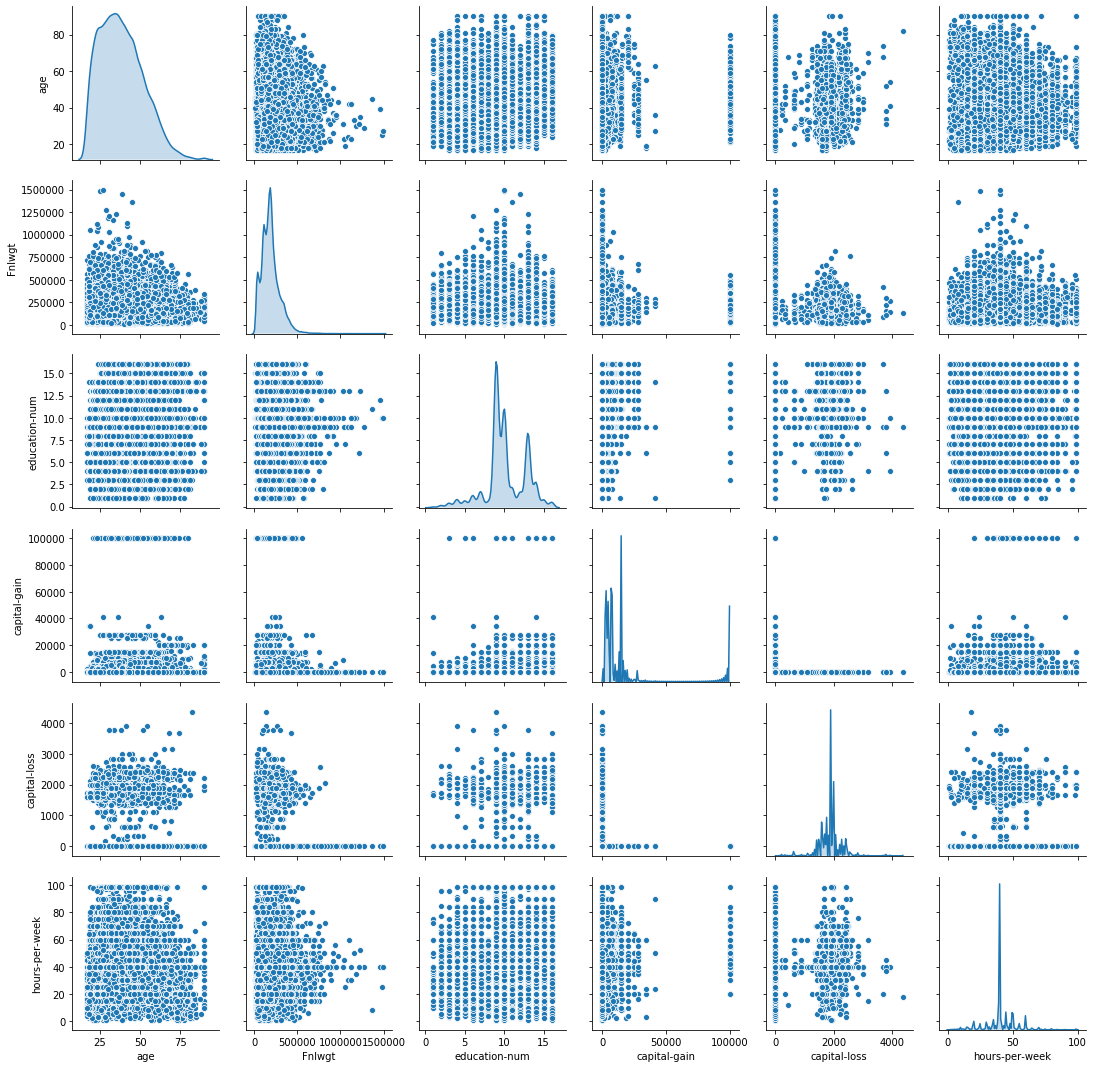

In [337]:
sns.pairplot(adult_nona_imputed,diag_kind='kde')

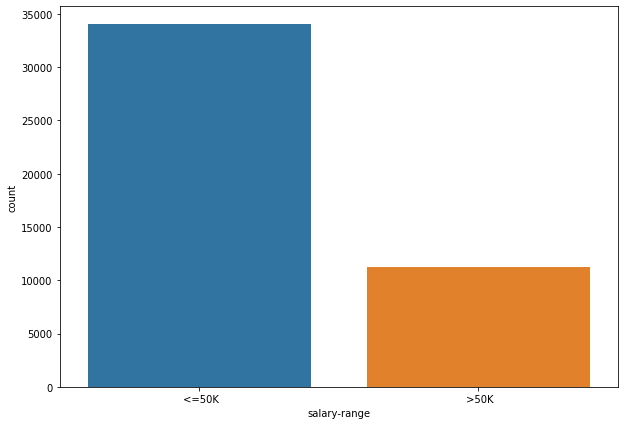

In [502]:
sns.countplot(adult_nona_imputed['salary-range'])

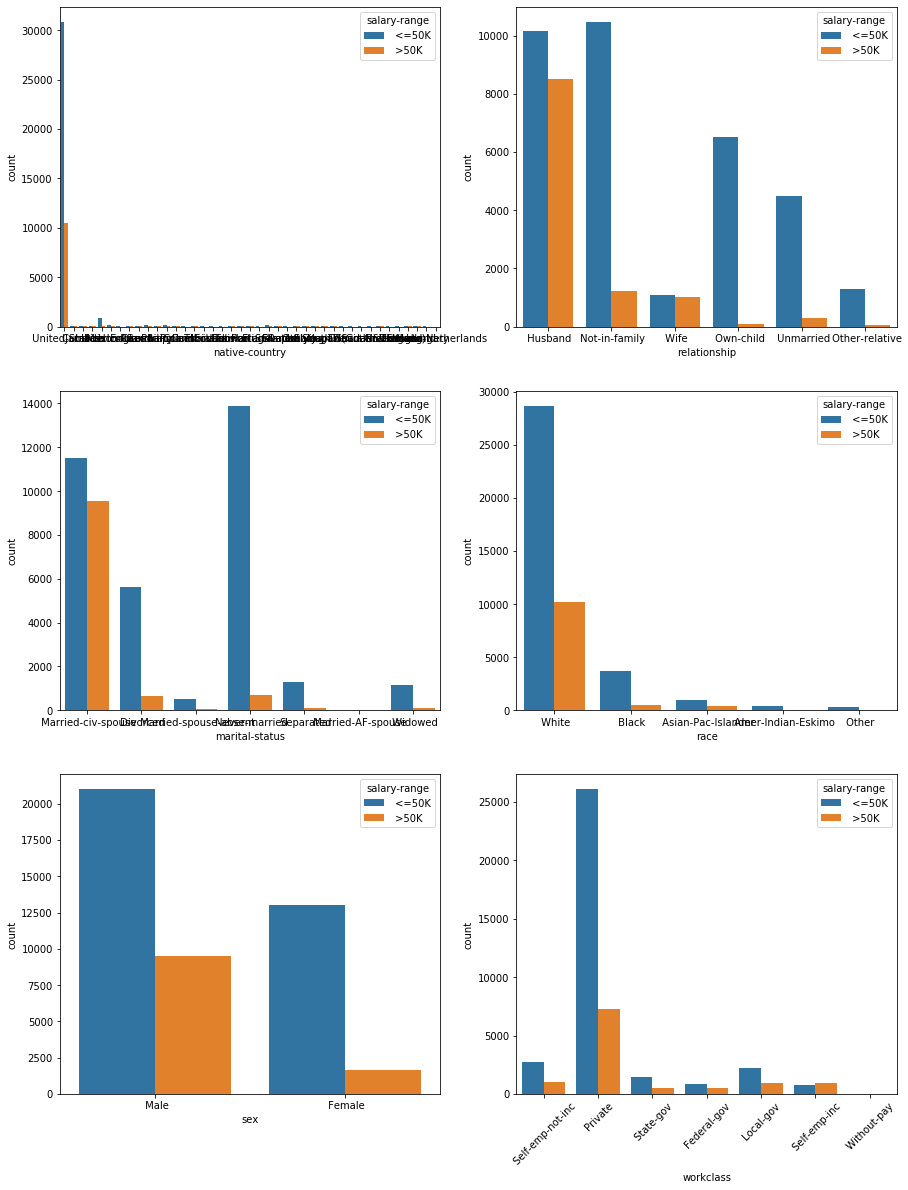

In [338]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))
plt.xticks(rotation=45)

sns.countplot(adult_nona_imputed['workclass'],hue=adult_nona_imputed['salary-range'],ax=f)
sns.countplot(adult_nona_imputed['relationship'],hue=adult_nona_imputed['salary-range'],ax=b)
sns.countplot(adult_nona_imputed['marital-status'],hue=adult_nona_imputed['salary-range'],ax=c)
sns.countplot(adult_nona_imputed['race'],hue=adult_nona_imputed['salary-range'],ax=d)
sns.countplot(adult_nona_imputed['sex'],hue=adult_nona_imputed['salary-range'],ax=e)
sns.countplot(adult_nona_imputed['native-country'],hue=adult_nona_imputed['salary-range'],ax=a)


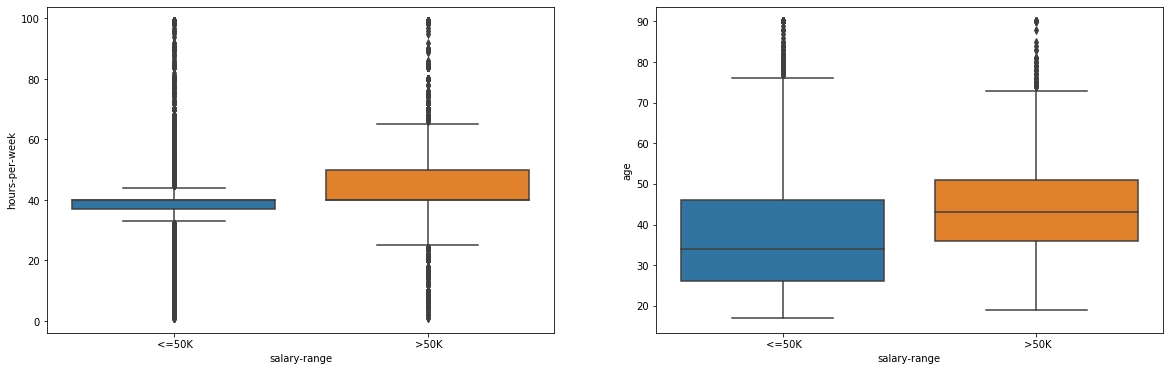

In [339]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours-per-week',x='salary-range',data=adult_nona_imputed,ax=a)
sns.boxplot(y='age',x='salary-range',data=adult_nona_imputed,ax=b)


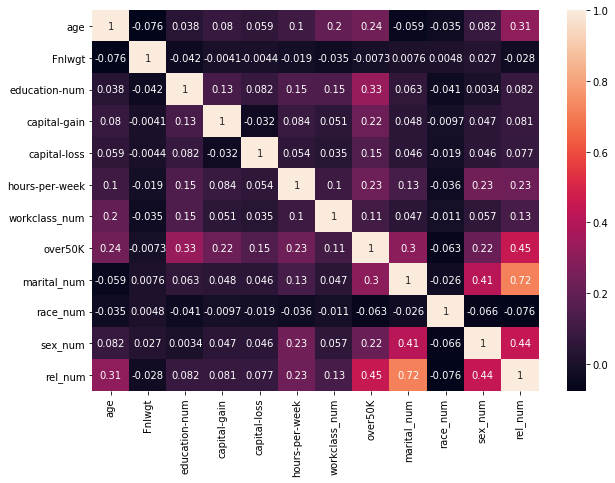

In [499]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(adult_nona_imputed.corr(), annot = True);

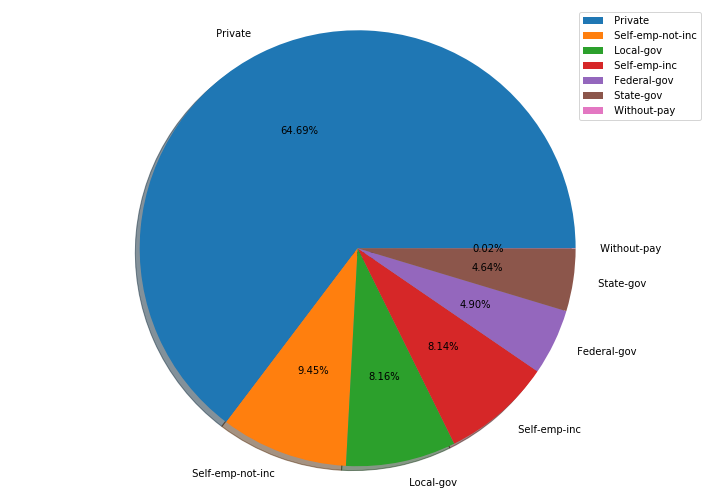

In [501]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = adult_nona_imputed.loc[adult_nona_imputed['salary-range'] == ' >50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Preprocessing data

We need to create numerical columns representing the categorical data to run an ML model.

In [340]:
adult_nona_imputed.head()

,age,workclass,Fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [343]:
adult_nona_imputed['workclass_num'] = adult_nona_imputed.workclass.map({' Private':0, ' State-gov':1, ' Federal-gov':2, ' Self-emp-not-inc':3, ' Self-emp-inc':4, ' Local-gov':5, ' Without-pay':6})
adult_nona_imputed['over50K'] = np.where(adult_nona_imputed['salary-range'] == ' <=50K', 0, 1)
adult_nona_imputed['marital_num'] = adult_nona_imputed['marital-status'].map({' Widowed':0, ' Divorced':1, ' Separated':2, ' Never-married':3, ' Married-civ-spouse':4, ' Married-AF-spouse':4, ' Married-spouse-absent':5})
adult_nona_imputed['race_num'] = adult_nona_imputed.race.map({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4})
adult_nona_imputed['sex_num'] = np.where(adult_nona_imputed.sex == ' Female', 0, 1)
adult_nona_imputed['rel_num'] = adult_nona_imputed.relationship.map({' Not-in-family':0, ' Unmarried':0, ' Own-child':0, ' Other-relative':0, ' Husband':1, ' Wife':1})

adult_nona_imputed.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,age,workclass,Fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,salary-range,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,3,0,4,0,1,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,0,0,1,0,1,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,0,0,4,1,1,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0,0,4,1,0,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,0,0,4,0,0,1


In [344]:
X = adult_nona_imputed[['workclass_num', 'education-num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss']]
y = adult_nona_imputed.over50K

#### Splitting data

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=13)

### 1> Logistic Regression

In [346]:
# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Report               precision    recall  f1-score   support

           0       0.86      0.92      0.89     10170
           1       0.71      0.57      0.63      3396

    accuracy                           0.83     13566
   macro avg       0.79      0.74      0.76     13566
weighted avg       0.83      0.83      0.83     13566

Accuracy 0.8332596196373286


In [347]:
print(metrics.confusion_matrix(y_test,y_pred))

[[9380  790]
 [1472 1924]]


In [348]:
accuracy = (9639+1958)/(9639+531+1438+1958)
print('Accuracy :',accuracy)

precision = (1958)/(1958+531)
print('Precision :',precision)

recall = (1958)/(1958+1438)
print('Recall :',recall)

Accuracy : 0.8548577325667109
Precision : 0.786661309762957
Recall : 0.5765606595995288


### 2> KNN

In [349]:
k_range = np.arange(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

16 0.8555211558307534


so for k =16 we have good accuracy so lets test on k=16

In [350]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

Report               precision    recall  f1-score   support

           0       0.87      0.95      0.91     10170
           1       0.79      0.56      0.66      3396

    accuracy                           0.85     13566
   macro avg       0.83      0.76      0.78     13566
weighted avg       0.85      0.85      0.84     13566

Accuracy 0.8536783134306354


In [351]:
print(metrics.confusion_matrix(y_test,y_pred))

[[9665  505]
 [1480 1916]]


In [352]:
accuracy = (9665+1916)/(9665+505+1480+1916)
print('Accuracy :',accuracy)

precision = (1916)/(1916+505)
print('Precision :',precision)

recall = (1916)/(1916+1480)
print('Recall :',recall)

Accuracy : 0.8536783134306354
Precision : 0.7914085088806279
Recall : 0.5641931684334511


### 3> Naive Bayes

In [353]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb)
y_pred = nb.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
Report               precision    recall  f1-score   support

           0       0.81      0.95      0.87     10170
           1       0.67      0.32      0.43      3396

    accuracy                           0.79     13566
   macro avg       0.74      0.63      0.65     13566
weighted avg       0.77      0.79      0.76     13566

Accuracy 0.7899159663865546


In [354]:
print(metrics.confusion_matrix(y_test,y_pred))

[[9625  545]
 [2305 1091]]


In [355]:
accuracy = (9625+1091)/(9625+545+1091+2305)
print('Accuracy :',accuracy)

precision = (1091)/(1091+545)
print('Precision :',precision)

recall = (1091)/(1091+2305)
print('Recall :',recall)

Accuracy : 0.7899159663865546
Precision : 0.6668704156479217
Recall : 0.3212603062426384


### 4> SVM

In [356]:
model = svm.SVC()
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Report               precision    recall  f1-score   support

           0       0.87      0.95      0.91     10170
           1       0.78      0.58      0.67      3396

    accuracy                           0.86     13566
   macro avg       0.83      0.76      0.79     13566
weighted avg       0.85      0.86      0.85     13566

Accuracy 0.8550051599587203


In [357]:
print(metrics.confusion_matrix(y_test,y_pred))

[[9623  547]
 [1420 1976]]


In [358]:
accuracy = (9623+1976)/(9623+547+1420+1976)
print('Accuracy :',accuracy)

precision = (1976)/(1976+547)
print('Precision :',precision)

recall = (1976)/(1976+1420)
print('Recall :',recall)

Accuracy : 0.8550051599587203
Precision : 0.7831946095917558
Recall : 0.5818610129564193


## Using all the columns

In [445]:
adult_nona_imputed_new = adult_nona.dropna()
adult_nona_imputed_new.head()

,age,workclass,Fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [446]:
adult_nona_imputed_new['sex'] = adult_nona_imputed_new['sex'].map({' Male': 1, ' Female': 0}) 

adult_nona_imputed_new['race'] = adult_nona_imputed_new['race'].map({' White': 1, ' Asian-Pac-Islander': 1, ' Black':0, ' Amer-Indian-Eskimo':0, ' Other':0}) 
adult_nona_imputed_new['relationship'] = adult_nona_imputed_new['relationship'].map({' Not-in-family':0, ' Unmarried':0, ' Own-child':0, ' Other-relative':0, ' Husband':1, ' Wife':1})
adult_nona_imputed_new['marital-status'] = adult_nona_imputed_new['marital-status'].map({'Widowed':0, 'Divorced':0, 'Separated':0, 'Never-married':0, 'Married-civ-spouse':1, 'Married-AF-spouse':1, 'Married-spouse-absent':0})

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

relationship and marital status almost contain same info so marital-status can be removed

In [447]:
adult_nona_imputed_new.drop(['marital-status'], axis=1,inplace=True)

In [448]:
adult_nona_imputed_new.drop(['education'], axis=1,inplace=True)
adult_nona_imputed_new.drop(['Fnlwgt'], axis=1,inplace=True)

In [449]:
labels = ['workclass', 'occupation', 'native-country']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for l in labels:
    adult_nona_imputed_new[l]=le.fit_transform(adult_nona_imputed_new[l])
adult_nona_imputed_new.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,age,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,50,4,13,3,1,1,1,0,0,13,38,<=50K
1,38,2,9,5,0,1,1,0,0,40,38,<=50K
2,53,2,7,5,1,0,1,0,0,40,38,<=50K
3,28,2,13,9,1,0,0,0,0,40,4,<=50K
4,37,2,14,3,1,1,0,0,0,40,38,<=50K


In [450]:
y1 = adult_nona_imputed_new['salary-range']
X1 = adult_nona_imputed_new.drop('salary-range',axis=1)


In [451]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.30, random_state=12)

### 1> Logistic Regression

In [452]:
# instantiate
logreg1 = LogisticRegression(solver='newton-cg')

# fit
logreg1.fit(X_train, y_train)

# predict
y_pred = logreg1.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

Report               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     10172
        >50K       0.73      0.57      0.64      3394

    accuracy                           0.84     13566
   macro avg       0.80      0.75      0.77     13566
weighted avg       0.83      0.84      0.83     13566

Accuracy 0.8403361344537815


In [453]:
print(metrics.confusion_matrix(y_test,y_pred))

[[9461  711]
 [1455 1939]]


In [454]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

In [455]:
accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.8403361344537815
Precision : 0.571302298173247
Recall : 0.7316981132075472


### 2> KNN

In [456]:
k_range = np.arange(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

13 0.8426949727259325


In [457]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

Report               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     10172
        >50K       0.73      0.57      0.64      3394

    accuracy                           0.84     13566
   macro avg       0.80      0.75      0.77     13566
weighted avg       0.83      0.84      0.83     13566

Accuracy 0.8401887070617721


In [458]:
print(metrics.confusion_matrix(y_test,y_pred))

[[9462  710]
 [1458 1936]]


In [459]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

In [460]:
accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.8401887070617721
Precision : 0.5704183853859752
Recall : 0.7316704459561603


### 3> Naive Bayes

In [463]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb)
y_pred = nb.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
Report               precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     10172
        >50K       0.68      0.31      0.43      3394

    accuracy                           0.79     13566
   macro avg       0.74      0.63      0.65     13566
weighted avg       0.77      0.79      0.76     13566

Accuracy 0.7910953855226301


In [464]:
print(metrics.confusion_matrix(y_test,y_pred))

[[9664  508]
 [2326 1068]]


In [465]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

In [466]:
accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.7910953855226301
Precision : 0.3146729522687095
Recall : 0.6776649746192893


### 4> SVM

In [468]:
model = svm.SVC()
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Report               precision    recall  f1-score   support

       <=50K       0.84      0.96      0.89     10172
        >50K       0.77      0.45      0.56      3394

    accuracy                           0.83     13566
   macro avg       0.80      0.70      0.73     13566
weighted avg       0.82      0.83      0.81     13566

Accuracy 0.8278048061329795


In [469]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.8278048061329795
Precision : 0.44549204478491455
Recall : 0.7690742624618515


# Finalizing the results

In [488]:
col_names =  ['model name', 'accuracy', 'recall','precision']
iteration1 = pd.DataFrame(columns = col_names)

In [489]:
iteration1.loc[0] = ['Logistic Regression',0.8548577325667109,0.5765606595995288,0.786661309762957]

In [490]:
iteration1.loc[1] = ['Naive Bayes',0.7899159663865546,0.3212603062426384,0.6668704156479217]

In [491]:
iteration1.loc[2] = ['KNN',0.8536783134306354,0.5641931684334511,0.7914085088806279]

In [492]:
iteration1

,model name,accuracy,recall,precision
0,Logistic Regression,0.854858,0.576561,0.786661
1,Naive Bayes,0.789916,0.321260,0.666870
2,KNN,0.853678,0.564193,0.791409


In [493]:
iteration1.loc[3] = ['SVM',0.8550051599587203,0.5818610129564193,0.7831946095917558]

In [494]:
iteration1

,model name,accuracy,recall,precision
0,Logistic Regression,0.854858,0.576561,0.786661
1,Naive Bayes,0.789916,0.321260,0.666870
2,KNN,0.853678,0.564193,0.791409
3,SVM,0.855005,0.581861,0.783195


In [482]:
col_names =  ['model name', 'accuracy', 'recall','precision']
iteration2 = pd.DataFrame(columns = col_names)

In [495]:
iteration2.loc[0] = ['Logistic Regression',0.8403361344537815,0.7316981132075472,0.571302298173247]

iteration2.loc[1] = ['Naive Bayes',0.7910953855226301,0.6776649746192893,0.3146729522687095]

iteration2.loc[2] = ['KNN',0.7910953855226301,0.6776649746192893,0.3146729522687095]

iteration2.loc[3] = ['SVM',0.8278048061329795,0.7690742624618515,0.44549204478491455]

In [496]:
iteration2

,model name,accuracy,recall,precision
0,Logistic Regression,0.840336,0.731698,0.571302
1,Naive Bayes,0.791095,0.677665,0.314673
2,KNN,0.791095,0.677665,0.314673
3,SVM,0.827805,0.769074,0.445492


=================================================================

In [497]:
iteration1

,model name,accuracy,recall,precision
0,Logistic Regression,0.854858,0.576561,0.786661
1,Naive Bayes,0.789916,0.321260,0.666870
2,KNN,0.853678,0.564193,0.791409
3,SVM,0.855005,0.581861,0.783195


In [498]:
iteration2

,model name,accuracy,recall,precision
0,Logistic Regression,0.840336,0.731698,0.571302
1,Naive Bayes,0.791095,0.677665,0.314673
2,KNN,0.791095,0.677665,0.314673
3,SVM,0.827805,0.769074,0.445492


## I was able to achieve higher accuracy and higher precision but lower recall on iteration1.
## In Iteration2 contrarily it is found there was a higher recall but a very low precision